<a href="https://colab.research.google.com/github/Tessellate-Imaging/Monk_Object_Detection/blob/master/application_model_zoo/Example%20-%20Oil%20Tanks%20Detection%20in%20Satellite%20Imagery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About the network

1. Paper on Focal Loss: https://arxiv.org/abs/1708.02002

2. Blog 1 on RetinaNet: https://medium.com/@14prakash/the-intuition-behind-retinanet-eb636755607d

3. Blog 2 on RetinaNet: https://blog.zenggyu.com/en/post/2018-12-05/retinanet-explained-and-demystified/

4. Blog 3 on RetinaNet: https://towardsdatascience.com/review-retinanet-focal-loss-object-detection-38fba6afabe4

5. Blog 4 on RetinaNet: https://analyticsindiamag.com/what-is-retinanet-ssd-focal-loss/

6. Blog 5 on RetinaNet: https://towardsdatascience.com/object-detection-on-aerial-imagery-using-retinanet-626130ba2203

# Table of contents


## 1. Installattion Instructions



## 2. Use trained model to detect trash in images



## 3. How to train using TACO dataset

# Installation

 - Run these commands
     
     - git clone https://github.com/Tessellate-Imaging/Monk_Object_Detection.git
     
     - cd Monk_Object_Detection/5_pytorch_retinanet/installation
     
 - Select the right requirements file and run
 
     - cat requirements.txt | xargs -n 1 -L 1 pip install

In [ ]:
! git clone https://github.com/Tessellate-Imaging/Monk_Object_Detection.git

In [ ]:
# For colab use the command below
! cd Monk_Object_Detection/5_pytorch_retinanet/installation && cat requirements_colab.txt | xargs -n 1 -L 1 pip install

# For Local systems and cloud select the other file
#! cd Monk_Object_Detection/5_pytorch_retinanet/installation && cat requirements.txt | xargs -n 1 -L 1 pip install

# Use already trained model for demo

In [1]:
import os
import sys
sys.path.append("Monk_Object_Detection/5_pytorch_retinanet/lib/");

In [2]:
from infer_detector import Infer

In [3]:
gtf = Infer();

In [4]:
# Download trained model

In [ ]:
! wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1Bh4nRyX-GBnEy9RWql_IBS3pzHyCWt-w' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1Bh4nRyX-GBnEy9RWql_IBS3pzHyCWt-w" -O obj_yyminist_trained.zip && rm -rf /tmp/cookies.txt

In [5]:
! unzip -qq obj_yyminist_trained.zip

In [6]:
gtf.Model(model_path="obj_yyminist_trained/final_model.pt");

/home/abhi/.virtualenvs/monk_obj_5_retinanet/lib/python3.6/site-packages/torch/serialization.py:493: SourceChangeWarning: source code of class 'torch.nn.modules.container.Sequential' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


In [7]:
f = open("obj_yyminist_trained/classes.txt", 'r');
class_list = f.readlines();
f.close();
for i in range(len(class_list)):
    class_list[i] = class_list[i][:-1]

In [8]:
ls obj_yyminist_trained/test

1.jpg  2.jpg  3.jpg  4.jpg  5.jpg  6.jpg  7.jpg  8.jpg


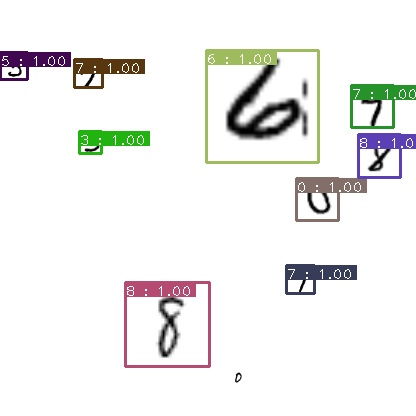

In [9]:
img_path = "obj_yyminist_trained/test/1.jpg";
scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.4);
from IPython.display import Image
Image(filename='output.jpg') 

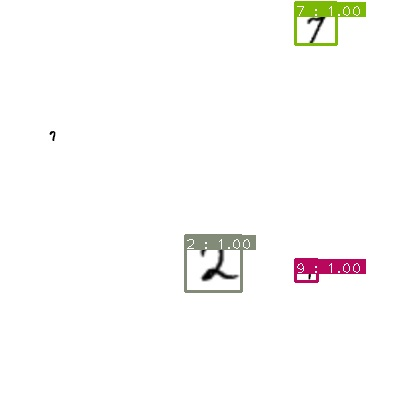

In [10]:
img_path = "obj_yyminist_trained/test/2.jpg";
scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.4);
from IPython.display import Image
Image(filename='output.jpg') 

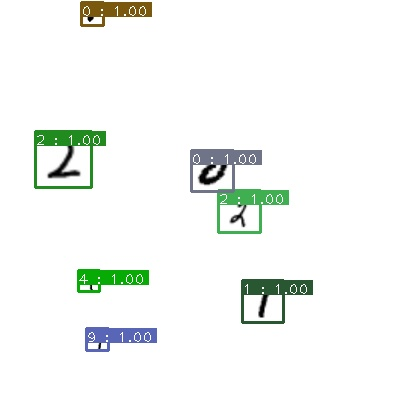

In [11]:
img_path = "obj_yyminist_trained/test/3.jpg";
scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.4);
from IPython.display import Image
Image(filename='output.jpg') 

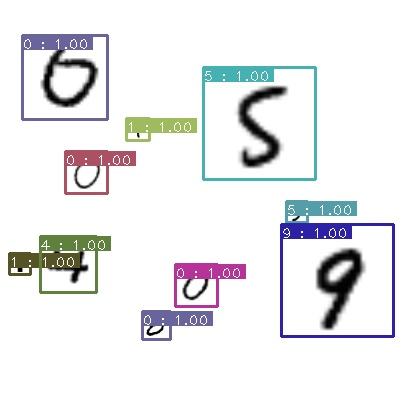

In [12]:
img_path = "obj_yyminist_trained/test/4.jpg";
scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.4);
from IPython.display import Image
Image(filename='output.jpg') 

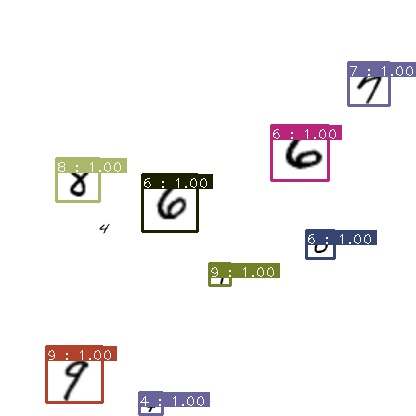

In [13]:
img_path = "obj_yyminist_trained/test/5.jpg";
scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.4);
from IPython.display import Image
Image(filename='output.jpg') 

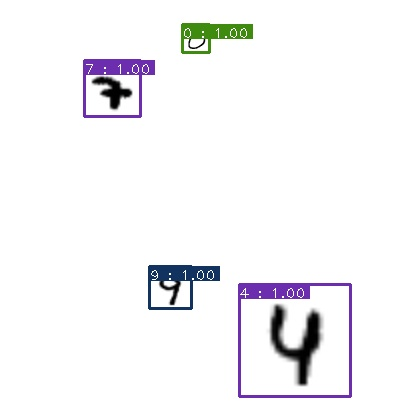

In [14]:
img_path = "obj_yyminist_trained/test/6.jpg";
scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.4);
from IPython.display import Image
Image(filename='output.jpg') 

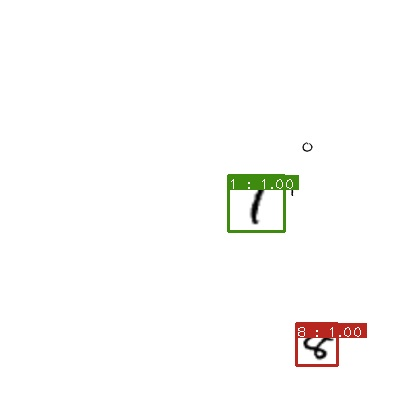

In [15]:
img_path = "obj_yyminist_trained/test/7.jpg";
scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.4);
from IPython.display import Image
Image(filename='output.jpg') 

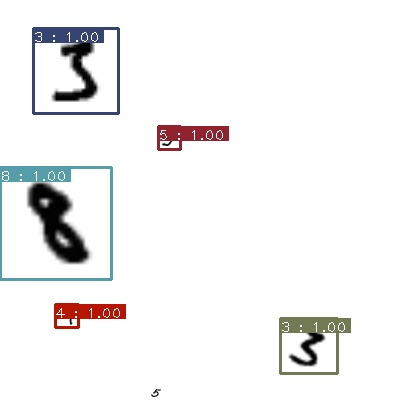

In [16]:
img_path = "obj_yyminist_trained/test/8.jpg";
scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.4);
from IPython.display import Image
Image(filename='output.jpg') 

# Train your own detector

# Dataset

  - Credits - https://github.com/pratikkayal/PlantDoc-Object-Detection-Dataset

In [ ]:
# Download the dataset

In [ ]:
! git clone https://github.com/YunYang1994/yymnist.git

In [ ]:
! python yymnist/make_data.py

In [ ]:
import os
import numpy as np
import cv2
from tqdm import tqdm
import pandas as pd

In [ ]:
f = open("yymnist/labels.txt", 'r');
lines = f.readlines();
f.close();

In [ ]:
combined = [];
for i in tqdm(range(len(lines))):
    tmp = lines[i][:len(lines[i])-1].split(" ");
    img_name = tmp[0].split("/")[-1];

    wr = "";
    for j in range(1, len(tmp)):
        x1, y1, x2, y2, label = tmp[j].split(",");
        wr += x1 + " " + y1 + " " + x2 + " " + y2 + " " + label + " ";

    combined.append([img_name, wr]);

In [ ]:
df = pd.DataFrame(combined, columns = ['ID', 'Label']);
df.to_csv("yymnist/train_labels.csv", index=False);

In [ ]:
import os
import numpy as np 
import cv2
import dicttoxml
import xml.etree.ElementTree as ET
from xml.dom.minidom import parseString
from tqdm import tqdm
import shutil
import json
import pandas as pd


root = "yymnist/";
img_dir = "Images/";
anno_file = "train_labels.csv";


dataset_path = root;
images_folder = root + "/" + img_dir;
annotations_path = root + "/annotations/";


if not os.path.isdir(annotations_path):
    os.mkdir(annotations_path)
    
input_images_folder = images_folder;
input_annotations_path = root + "/" + anno_file;


output_dataset_path = root;
output_image_folder = input_images_folder;
output_annotation_folder = annotations_path;

tmp = img_dir.replace("/", "");
output_annotation_file = output_annotation_folder + "/instances_" + tmp + ".json";
output_classes_file = output_annotation_folder + "/classes.txt";

if not os.path.isdir(output_annotation_folder):
    os.mkdir(output_annotation_folder);

df = pd.read_csv(input_annotations_path);
columns = df.columns

delimiter = " ";

list_dict = [];
anno = [];
for i in range(len(df)):
    img_name = df[columns[0]][i];
    labels = df[columns[1]][i];
    tmp = labels.split(delimiter);
    for j in range(len(tmp)//5):
        label = tmp[j*5+4];
        if(label not in anno):
            anno.append(label);
    anno = sorted(anno)
    
for i in tqdm(range(len(anno))):
    tmp = {};
    tmp["supercategory"] = "master";
    tmp["id"] = i;
    tmp["name"] = anno[i];
    list_dict.append(tmp);

anno_f = open(output_classes_file, 'w');
for i in range(len(anno)):
    anno_f.write(anno[i] + "\n");
anno_f.close();


coco_data = {};
coco_data["type"] = "instances";
coco_data["images"] = [];
coco_data["annotations"] = [];
coco_data["categories"] = list_dict;
image_id = 0;
annotation_id = 0;


for i in tqdm(range(len(df))):
    img_name = df[columns[0]][i];
    labels = df[columns[1]][i];
    tmp = labels.split(delimiter);
    image_in_path = input_images_folder + "/" + img_name;
    #print(image_in_path)
    img = cv2.imread(image_in_path, 1);
    h, w, c = img.shape;

    images_tmp = {};
    images_tmp["file_name"] = img_name;
    images_tmp["height"] = h;
    images_tmp["width"] = w;
    images_tmp["id"] = image_id;
    coco_data["images"].append(images_tmp);
    

    for j in range(len(tmp)//5):
        x1 = int(tmp[j*5+0]);
        y1 = int(tmp[j*5+1]);
        x2 = int(tmp[j*5+2]);
        y2 = int(tmp[j*5+3]);
        label = tmp[j*5+4];
        annotations_tmp = {};
        annotations_tmp["id"] = annotation_id;
        annotation_id += 1;
        annotations_tmp["image_id"] = image_id;
        annotations_tmp["segmentation"] = [];
        annotations_tmp["ignore"] = 0;
        annotations_tmp["area"] = (x2-x1)*(y2-y1);
        annotations_tmp["iscrowd"] = 0;
        annotations_tmp["bbox"] = [x1, y1, x2-x1, y2-y1];
        annotations_tmp["category_id"] = anno.index(label);

        coco_data["annotations"].append(annotations_tmp)
    image_id += 1;

outfile =  open(output_annotation_file, 'w');
json_str = json.dumps(coco_data, indent=4);
outfile.write(json_str);
outfile.close();

# Training

In [ ]:
import os
import sys
sys.path.append("Monk_Object_Detection/5_pytorch_retinanet/lib/");

In [ ]:
from train_detector import Detector

In [ ]:
gtf = Detector();

In [ ]:
root_dir = "./";
coco_dir = "yymnist";
img_dir = "";
set_dir = "Images";

In [ ]:
gtf.Train_Dataset(root_dir, coco_dir, img_dir, set_dir, batch_size=2, use_gpu=True)

In [ ]:
gtf.system_dict["local"]["dataset_train"].classes

In [ ]:
gtf.Model(model_name="resnet101");

In [ ]:
gtf.Set_Hyperparams(lr=0.0001, print_interval=20)

In [ ]:
gtf.Train(num_epochs=20, output_model_name="final_model.pt");

# Inference

In [ ]:
import os
import sys
sys.path.append("Monk_Object_Detection/5_pytorch_retinanet/lib/");

In [ ]:
from infer_detector import Infer

In [ ]:
gtf = Infer();

In [ ]:
gtf.Model(model_path="final_model.pt");

In [ ]:
f = open("yymnist/annotations/classes.txt", 'r');
class_list = f.readlines();
f.close();
for i in range(len(class_list)):
    class_list[i] = class_list[i][:-1]

In [ ]:
len(class_list)

In [ ]:
import os 
img_list = os.listdir("yymnist/Images/")

In [ ]:
img_path = "yymnist/Images/" + img_list[0];
scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.4);
from IPython.display import Image
Image(filename='output.jpg') 